<a href="https://colab.research.google.com/github/wilberquito/Thesis/blob/main/Code/nn/notebooks/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Exploration

In [1]:
import requests
from pathlib import Path
import pandas as pd
import seaborn as sns
from zipfile import ZipFile

try:
    import google.colab
    from google.colab import drive
    IN_COLAB = True
    drive.mount('/content/drive')
except:
    IN_COLAB = False

print(f"In colab: {IN_COLAB}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
In colab: True


In [2]:
def pull_code():
  print("Unzipping the code from google drive")
  !rm -rf modular/
  !unzip ./drive/MyDrive/modular.zip -d . >/dev/null 2>&1

if IN_COLAB:
    pull_code() 

Unzipping the code from google drive


In [5]:
def pull_data():
  answer = input("You sure? Y/n\n")
  if answer != "Y":
    return

  print("Unzipping the data from google drive")
  !rm -rf data.etl/
  !unzip ./drive/MyDrive/data.zip -d . >/dev/null 2>&1

if IN_COLAB:
    pull_data() 

You sure? Y/n
Y
Unzipping the data from google drive


In [3]:
import modular.dataset as m_dataset

data_dir = 'data.etl'
data_folder = '512'

train_df, test_df, mapping = m_dataset.get_df(data_dir,
                                              data_folder)
train_df.shape, test_df.shape, mapping 

((31265, 13),
 (10982, 9),
 {'AK': 0,
  'BCC': 1,
  'BKL': 2,
  'DF': 3,
  'SCC': 4,
  'VASC': 5,
  'melanoma': 6,
  'nevus': 7})

In [7]:
pd.DataFrame(mapping, index=mapping.values()).head(1)

,AK,BCC,BKL,DF,SCC,VASC,melanoma,nevus
0,0,1,2,3,4,5,6,7


For display purposes, n shouldn't
        be larger than 10, setting to 10 and removing shape display.


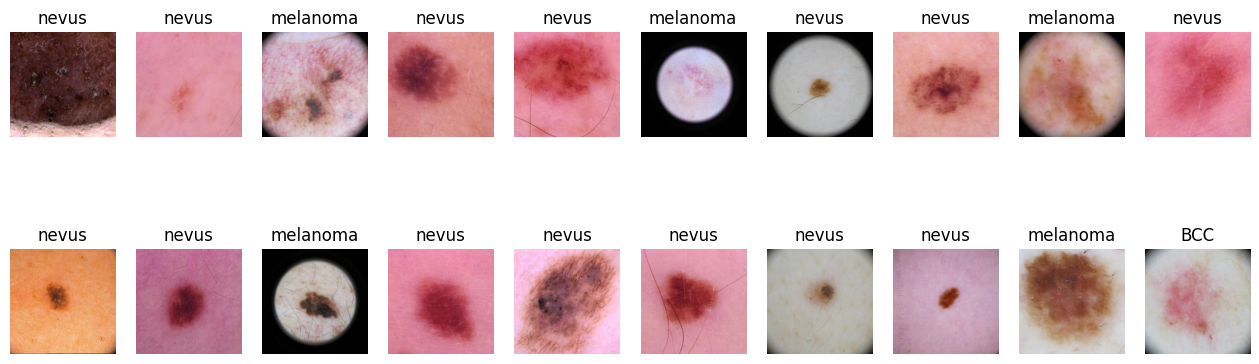

In [4]:
import modular.utility as m_utility
from torch.utils.data import DataLoader

# Compute the mapping class
idx_to_class = { i : classname for classname, i in mapping.items() }

# Create train and validate dataset
melanoma_dataset = m_dataset.MelanomaDataset(train_df,
                                             mode='train',
                                             idx_to_class=idx_to_class)
melanoma_dataloader = DataLoader(melanoma_dataset, batch_size=64, shuffle=True)
m_utility.display_random_images(melanoma_dataset, n=20, display_shape=False)

## Data Analysis

In [5]:
train_df.tail()

,Unnamed: 0,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,filepath
31260,25267,ISIC_0073247,-1,female,85.0,head/neck,BCC,benign,1,19,1024,1024,data.etl/jpeg-isic2019-512x512/train/ISIC_0073...
31261,25268,ISIC_0073248,-1,male,65.0,anterior torso,BKL,benign,2,7,1024,1024,data.etl/jpeg-isic2019-512x512/train/ISIC_0073...
31262,25269,ISIC_0073249,-1,male,70.0,lower extremity,melanoma,malignant,6,9,1024,1024,data.etl/jpeg-isic2019-512x512/train/ISIC_0073...
31263,25270,ISIC_0073251,-1,female,55.0,palms/soles,nevus,benign,7,15,1024,1024,data.etl/jpeg-isic2019-512x512/train/ISIC_0073...
31264,25271,ISIC_0073254,-1,male,50.0,upper extremity,BKL,benign,2,23,1024,1024,data.etl/jpeg-isic2019-512x512/train/ISIC_0073...


In [6]:
test_df.head()

,Unnamed: 0,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,width,height,filepath
0,0,ISIC_0052060,IP_3579794,male,70.0,NaN,6000,4000,data.etl/jpeg-melanoma-512x512/test/ISIC_00520...
1,1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,6000,4000,data.etl/jpeg-melanoma-512x512/test/ISIC_00523...
2,2,ISIC_0058510,IP_7960270,female,55.0,torso,6000,4000,data.etl/jpeg-melanoma-512x512/test/ISIC_00585...
3,3,ISIC_0073313,IP_6375035,female,50.0,torso,6000,4000,data.etl/jpeg-melanoma-512x512/test/ISIC_00733...
4,4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,1920,1080,data.etl/jpeg-melanoma-512x512/test/ISIC_00735...


In [7]:
train_df.shape, test_df.shape

((31265, 13), (10982, 9))

In [8]:
train_df.describe()

,Unnamed: 0,age_approx,target,tfrecord,width,height
count,31265.000000,30825.000000,31265.000000,31265.000000,31265.000000,31265.000000
mean,10787.762162,53.445418,5.445226,13.040844,1133.792004,891.995938
std,7615.350726,17.332589,2.351857,8.523935,749.065866,500.673148
min,0.000000,0.000000,0.000000,0.000000,576.000000,450.000000
25%,3908.000000,40.000000,4.000000,6.000000,600.000000,450.000000
50%,9639.000000,55.000000,7.000000,12.000000,1024.000000,1024.000000
75%,17455.000000,65.000000,7.000000,20.000000,1024.000000,1024.000000
max,25271.000000,90.000000,7.000000,29.000000,6000.000000,5184.000000


### Diagnosis

In [9]:
diagnosis_freq = train_df['diagnosis'].value_counts()
diagnosis_freq

nevus       18031
melanoma     5090
BCC          3320
BKL          2837
AK            867
SCC           628
VASC          253
DF            239
Name: diagnosis, dtype: int64

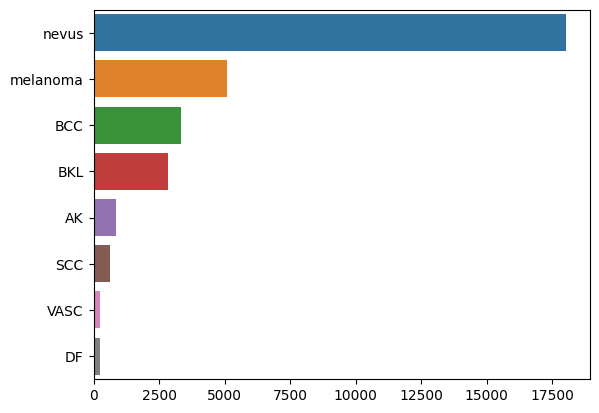

In [10]:
_ = sns.barplot(x=diagnosis_freq.values, y=diagnosis_freq.index)

### Diagnosis and Melanoma

In [11]:
grouped_df =  train_df.groupby(by=['diagnosis', 'benign_malignant'], 
           as_index=False).count()

pivot_table = grouped_df.pivot(index='diagnosis', columns='benign_malignant', values='sex')
pivot_table = pivot_table.fillna(0)
pivot_table

benign_malignant,benign,malignant
diagnosis,,
AK,867.0,0.0
BCC,3320.0,0.0
BKL,2837.0,0.0
DF,239.0,0.0
SCC,628.0,0.0
VASC,253.0,0.0
melanoma,0.0,5090.0
nevus,18031.0,0.0
